# Individual Coding Exercise (ICE) 8

In this ICE 8, the following topics are covered: visualizing a social network, conducting basic network analysis, enhancing the visualization of a network.

In [2]:
#importing necessary packages

import networkx as nx #this module helps with social network analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
SNAdata = pd.read_csv("ICE8_Data.csv", index_col=0) #index_col = 0 sets the first column as row names since the dataset is an adjacency matrix
G = nx.Graph(SNAdata) #Since we're using an adjacency matrix for a unidirected graph, we can call graph() function to create the social network

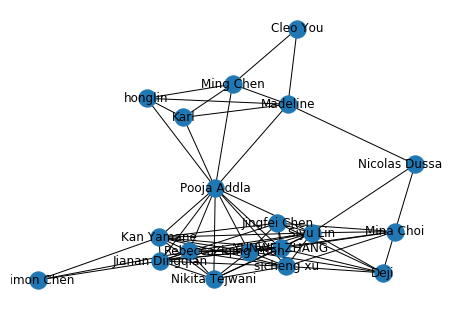

In [4]:
nx.draw(G, with_labels=True) #plotting the network

In [8]:
density = nx.density(G) #density is the measure of how complete the graph is i.e. how many edges are present in the network as compared to the total possible number of edges

print('The edge density is: %.3f' % (density)) #format for output decimal places


The edge density is: 0.415


In [5]:
degree = nx.degree(G) #finding the number of degrees i.e. how many edges each node has
                      #output will be a dictionary-like object
degree

DegreeView({'Nicolas Dussaillant': 3, 'Ming Chen': 5, 'Rebecca': 9, 'Nikita Tejwani': 8, 'Simon Chen': 3, 'Pooja Addla': 12, 'honglin': 4, 'Karl': 4, 'sicheng xu': 11, 'Jianan Dingqian': 10, 'Siyu Lin': 12, 'Ziqing Yuan': 11, 'Jingfei Chen': 8, 'Mina Choi': 7, 'Cleo You': 2, 'Deji': 6, 'Kan Yamane': 10, 'YUNWEI ZHANG': 11, 'Madeline': 6})

In [6]:
pd.DataFrame(degree) #visualizing the above dictionary better by converting it into a pandas dataframe

,0,1
0,Nicolas Dussaillant,3
1,Ming Chen,5
2,Rebecca,9
3,Nikita Tejwani,8
4,Simon Chen,3
5,Pooja Addla,12
6,honglin,4
7,Karl,4
8,sicheng xu,11
9,Jianan Dingqian,10


In [7]:
close = nx.closeness_centrality(G) #closeness is how quickly a node can travel to the rest of the graph
                                   #returns a dictionary in a different way as compared to degree()
pd.DataFrame.from_dict(close, orient = 'index') #specifying orientation

,0
Nicolas Dussaillant,0.529412
Ming Chen,0.514286
Rebecca,0.642857
Nikita Tejwani,0.620690
Simon Chen,0.428571
Pooja Addla,0.750000
honglin,0.500000
Karl,0.500000
sicheng xu,0.692308
Jianan Dingqian,0.666667


In [8]:
between = nx.betweenness_centrality(G) #betweenness detects the amount of influence a node has over the flow of information in a graph
                                       #finds nodes that serve as a bridge from one part of a graph to another
                                       #calculates unweighted shortest paths between all pairs of nodes in a graph
pd.DataFrame.from_dict(between, orient='index')

,0
Nicolas Dussaillant,0.028494
Ming Chen,0.043542
Rebecca,0.029879
Nikita Tejwani,0.000000
Simon Chen,0.000000
Pooja Addla,0.363663
honglin,0.000000
Karl,0.000000
sicheng xu,0.037340
Jianan Dingqian,0.042367


In [9]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities #runs the Clauset-Newman-Moore greedy modularity maximization.

#this begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

c = list(greedy_modularity_communities(G)) #putting the result into a list to see how many communities can be detected

print(len(c)) #printing the number of communities

2


In [12]:
#selecting and printing each community

community_0 = sorted(c[0]) 
community_1 = sorted(c[1])


print(community_0)
print(community_1)

['Deji', 'Jianan Dingqian', 'Jingfei Chen', 'Kan Yamane', 'Mina Choi', 'Nicolas Dussaillant', 'Nikita Tejwani', 'Rebecca', 'Simon Chen', 'Siyu Lin', 'YUNWEI ZHANG', 'Ziqing Yuan', 'sicheng xu']
['Cleo You', 'Karl', 'Madeline', 'Ming Chen', 'Pooja Addla', 'honglin']


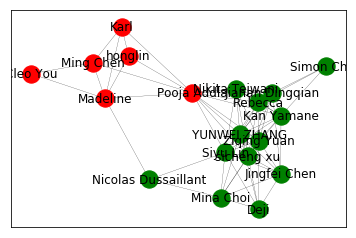

In [14]:
np.random.seed(123)

pos = nx.spring_layout(G) #obtaining the position of the nodes
                          #spring layout for a prettier graph

nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='green', label=True) #plotting first community in green
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='red', label=True) #plotting second community in red

nx.draw_networkx_edges(G, pos=pos, width=0.2) #printing out the edges

nx.draw_networkx_labels(G, pos=pos) #ensuring that label is printed

plt.show() #showing the plot so it supresses the other network outputs

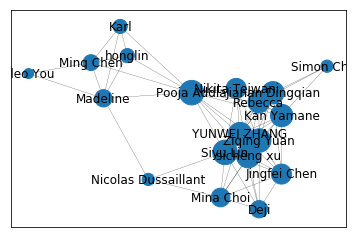

In [15]:
#manipulating the size and transparency of the nodes

nx.draw_networkx_nodes(G, pos=pos, nodelist=dict(degree).keys(), node_size = [v*50 for v in dict(degree).values()], label=True)
nx.draw_networkx_edges(G, pos=pos, width=0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

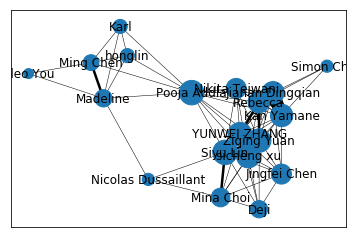

In [16]:
#manipulating the thickness of the edges

eWeight = nx.get_edge_attributes(G, 'weight') #obtaining the weight of each edge

nx.draw_networkx_nodes(G, pos=pos, nodelist = dict(degree).keys(), node_size = [v*50 for v in dict(degree).values()], label=True)
nx.draw_networkx_edges(G, pos, width = [5**e/10 for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)

plt.show()

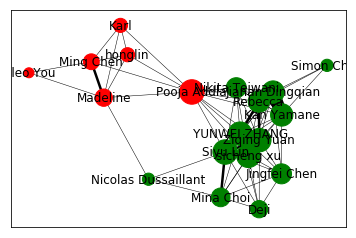

In [17]:
#degrees of each community
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}

#print out the nodes with color and size
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='green',
                       node_size = [v * 50 for v in community_0_degree.values()],
                       label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_1,
                       node_size = [v * 50 for v in community_1_degree.values()],
                       node_color='red', label = True)

#print out the edges with proper width
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])

#making sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

#show the plot so it supress the other networkx outputs
plt.show()